In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [192]:
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import backend as K
from IPython.display import display


In [193]:
facialpoints_df = pd.read_csv('KeyFacialPoints.csv')

In [194]:
facialpoints_df

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0             66.033564          39.002274           30.227008   
1             64.332936          34.970077           29.949277   
2             65.057053          34.909642           30.903789   
3             65.225739          37.261774           32.023096   
4             66.725301          39.621261           32.244810   
...                 ...                ...                 ...   
2135          67.180378          35.816373           33.239956   
2136          65.724490          36.301020           25.377551   
2137          68.430866          38.651975           28.895857   
2138          64.152180          30.691592           27.000898   
2139          66.683755          34.483429           30.784490   

      right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0              36.421678                59.582075                39.647423   
1              33.448715                58.856170                35.274349   
2              34.909642                59.412000                36.320968   
3              37.261774                60.003339                39.127179   
4              38.042032                58.565890                39.621261   
...                  ...                      ...                      ...   
2135           34.921932                59.347973                37.000904   
2136           37.311224                58.530612                37.739796   
2137           37.617027                61.659350                40.100902   
2138           40.868082                56.505624                34.126963   
2139           38.578939                59.255347                36.065143   

      left_eye_outer_corner_x  left_eye_outer_corner_y  \
0                   73.130346                39.969997   
1                   70.722723                36.187166   
2                   70.984421                36.320968   
3                   72.314713                38.380967   
4                   72.515926                39.884466   
...                       ...                      ...   
2135                72.667896                37.097600   
2136                74.448980                37.525510   
2137                75.586792                40.219182   
2138                73.436776                28.556335   
2139                73.942694                34.624653   

      right_eye_inner_corner_x  right_eye_inner_corner_y  ...  nose_tip_y  \
0                    36.356571                 37.389402  ...   57.066803   
1                    36.034723                 34.361532  ...   55.660936   
2                    37.678105                 36.320968  ...   53.538947   
3                    37.618643                 38.754115  ...   54.166539   
4                    36.982380                 39.094852  ...   64.889521   
...                        ...                       ...  ...         ...   
2135                 39.404349                 36.589944  ...   60.065396   
2136                 33.551020                 38.107143  ...   62.472789   
2137                 37.665118                 39.087245  ...   63.289576   
2138                 34.746122                 40.506939  ...   59.735799   
2139                 37.478531                 39.398041  ...   59.269388   

      mouth_left_corner_x  mouth_left_corner_y  mouth_right_corner_x  \
0               61.195308            79.970165             28.614496   
1               56.421447            76.352000             35.122383   
2               60.822947            73.014316             33.726316   
3               65.598887            72.703722             37.245496   
4               60.671411            77.523239             31.191755   
...                   ...                  ...                   ...   
2135            64.397610            73.248393             35.446431   
2136            66.928121            79.229046             28.015377   
2137  

In [195]:
facialpoints_df.shape

(2140, 31)

In [196]:
facialpoints_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [197]:
facialpoints_df['Image'][1] #Take a look at sample image 0-- Black, 255-- White

'219 215 204 196 204 211 212 200 180 168 178 196 194 196 203 209 199 192 197 201 207 215 199 190 182 180 183 190 190 176 175 175 170 158 162 170 150 133 133 128 121 115 115 114 112 114 113 112 120 127 123 118 112 109 112 110 107 106 104 104 100 98 105 122 135 143 152 135 114 104 81 74 87 107 98 82 84 79 70 69 62 62 79 94 97 100 98 93 100 100 97 96 93 92 88 84 222 219 220 211 207 199 185 178 171 175 196 199 199 200 201 205 202 200 204 206 211 219 204 192 188 185 185 193 189 180 177 178 173 158 159 162 145 133 133 129 122 118 116 115 114 115 115 118 127 132 127 120 116 119 118 114 114 113 110 108 105 104 110 130 140 149 152 128 106 106 91 78 90 107 101 84 90 93 79 75 73 59 58 74 94 102 100 99 97 90 94 96 95 92 88 86 231 224 212 197 191 186 176 170 172 190 201 199 200 203 204 210 215 211 210 213 213 217 210 192 188 188 189 194 189 183 181 183 175 158 158 158 142 132 133 131 125 120 121 120 116 115 116 122 135 137 129 122 121 125 121 119 120 118 117 112 112 109 116 136 149 156 149 126 109 

In [198]:
# Images are in space separated string format, we have to convert this into numpy array. Then convert the 1D array --> 2D array of size 96 x 96
facialpoints_df['Image'] = facialpoints_df['Image'].apply(lambda x: np.fromstring(x, dtype = int, sep = ' ').reshape(96,96))

In [199]:
facialpoints_df['Image'][1].shape #Shape of the resized 2D Array

(96, 96)

In [200]:
facialpoints_df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [201]:
print("mean = ",facialpoints_df['right_eye_center_x'].mean())
print("max = ",facialpoints_df['right_eye_center_x'].max())
print("min = ",facialpoints_df['right_eye_center_x'].min())

mean =  29.64026856456148
max =  42.495171727
min =  18.9226106286


In [202]:
facialpoints_df.describe()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
count        2140.000000        2140.000000         2140.000000   
mean           66.221549          36.842274           29.640269   
std             2.087683           2.294027            2.051575   
min            47.835757          23.832996           18.922611   
25%            65.046300          35.468842           28.472224   
50%            66.129065          36.913319           29.655440   
75%            67.332093          38.286438           30.858673   
max            78.013082          46.132421           42.495172   

       right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
count         2140.000000              2140.000000              2140.000000   
mean            37.063815                59.272128                37.856014   
std              2.234334                 2.005631                 2.034500   
min             24.773072                41.779381                27.190098   
25%             35.818377                58.113054                36.607950   
50%             37.048085                59.327154                37.845220   
75%             38.333884                60.521492                39.195431   
max             45.980981                69.023030                47.190316   

       left_eye_outer_corner_x  left_eye_outer_corner_y  \
count              2140.000000              2140.000000   
mean                 73.412473                37.640110   
std                   2.701639                 2.684162   
min                  52.947144                26.250023   
25%                  71.741978                36.102409   
50%                  73.240045                37.624207   
75%                  74.978684                39.308331   
max                  87.032252                49.653825   

       right_eye_inner_corner_x  right_eye_inner_corner_y  ...   nose_tip_x  \
count               2140.000000               2140.000000  ...  2140.000000   
mean                  36.603107                 37.920852  ...    47.952141   
std                    1.822784                  2.009505  ...     3.276053   
min                   24.112624                 26.250023  ...    24.472590   
25%                   35.495730                 36.766783  ...    46.495330   
50%                   36.620735                 37.920336  ...    47.900511   
75%                   37.665280                 39.143921  ...    49.260657   
max                   47.293746                 44.887301  ...    65.279654   

        nose_tip_y  mouth_left_corner_x  mouth_left_corner_y  \
count  2140.000000          2140.000000          2140.000000   
mean     57.253926            63.419076            75.887660   
std       4.528635             3.650131             4.438565   
min      41.558400            43.869480            57.023258   
25%      54.466000            61.341291            72.874263   
50%      57.638582            63.199057            75.682465   
75%      60.303524            65.302398            78.774969   
max      75.992731            84.767123            94.673637   

       mouth_right_corner_x  mouth_right_corner_y  mouth_center_top_lip_x  \
count           2140.000000           2140.000000             2140.000000   
mean              32.967365             76.134065               48.081325   
std                3.595103              4.259514                2.723274   
min                9.778137             56.690208               32.260312   
25%               30.879288             73.280038               46.580004   
50%               33.034022             75.941985               47.939031   
75%               35.063575             78.884031               49.290000   
max               50.973348             93.443176               61.804506   

       mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
count             2140.000000                2140.000000   
mean                72.681125                  48.149654

### Perform Image Visualization

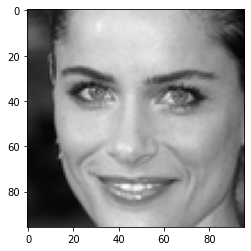

In [203]:
# Plot a random image from the dataset along with facial keypoints
i = np.random.randint(1, len(facialpoints_df))
plt.imshow(facialpoints_df['Image'][i], cmap = 'gray')

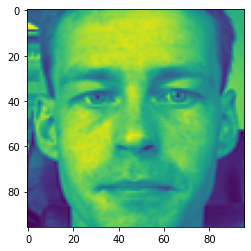

In [204]:
i = np.random.randint(1, len(facialpoints_df))
plt.imshow(facialpoints_df['Image'][i], cmap = 'viridis')

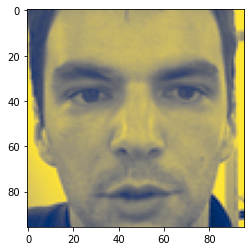

In [205]:
i = np.random.randint(1, len(facialpoints_df))
plt.imshow(facialpoints_df['Image'][i], cmap = 'cividis')

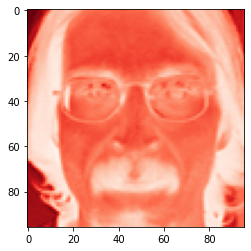

In [206]:
i = np.random.randint(1, len(facialpoints_df))
plt.imshow(facialpoints_df['Image'][i], cmap = 'Reds')

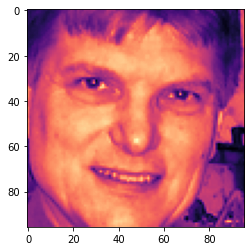

In [207]:
i = np.random.randint(1, len(facialpoints_df))
plt.imshow(facialpoints_df['Image'][i], cmap = 'magma')

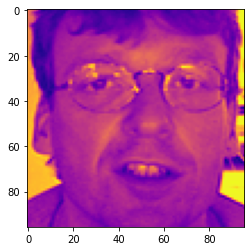

In [208]:
i = np.random.randint(1, len(facialpoints_df))
plt.imshow(facialpoints_df['Image'][i], cmap = 'plasma')

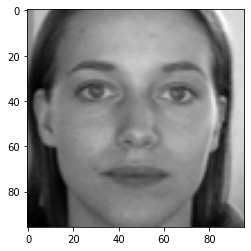

In [209]:
i = np.random.randint(1, len(facialpoints_df))
plt.imshow(facialpoints_df['Image'][i], cmap = 'gray')

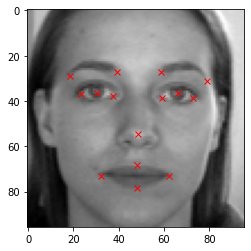

In [210]:
plt.figure()
plt.imshow(facialpoints_df['Image'][i], cmap = 'gray')
#Here in this for loop we are plotting the (x,y) coordinates of different 15 key features of the Facial Data
for j in range(1,31,2):
    plt.plot(facialpoints_df.loc[i][j-1],facialpoints_df.loc[i][j], 'rx')

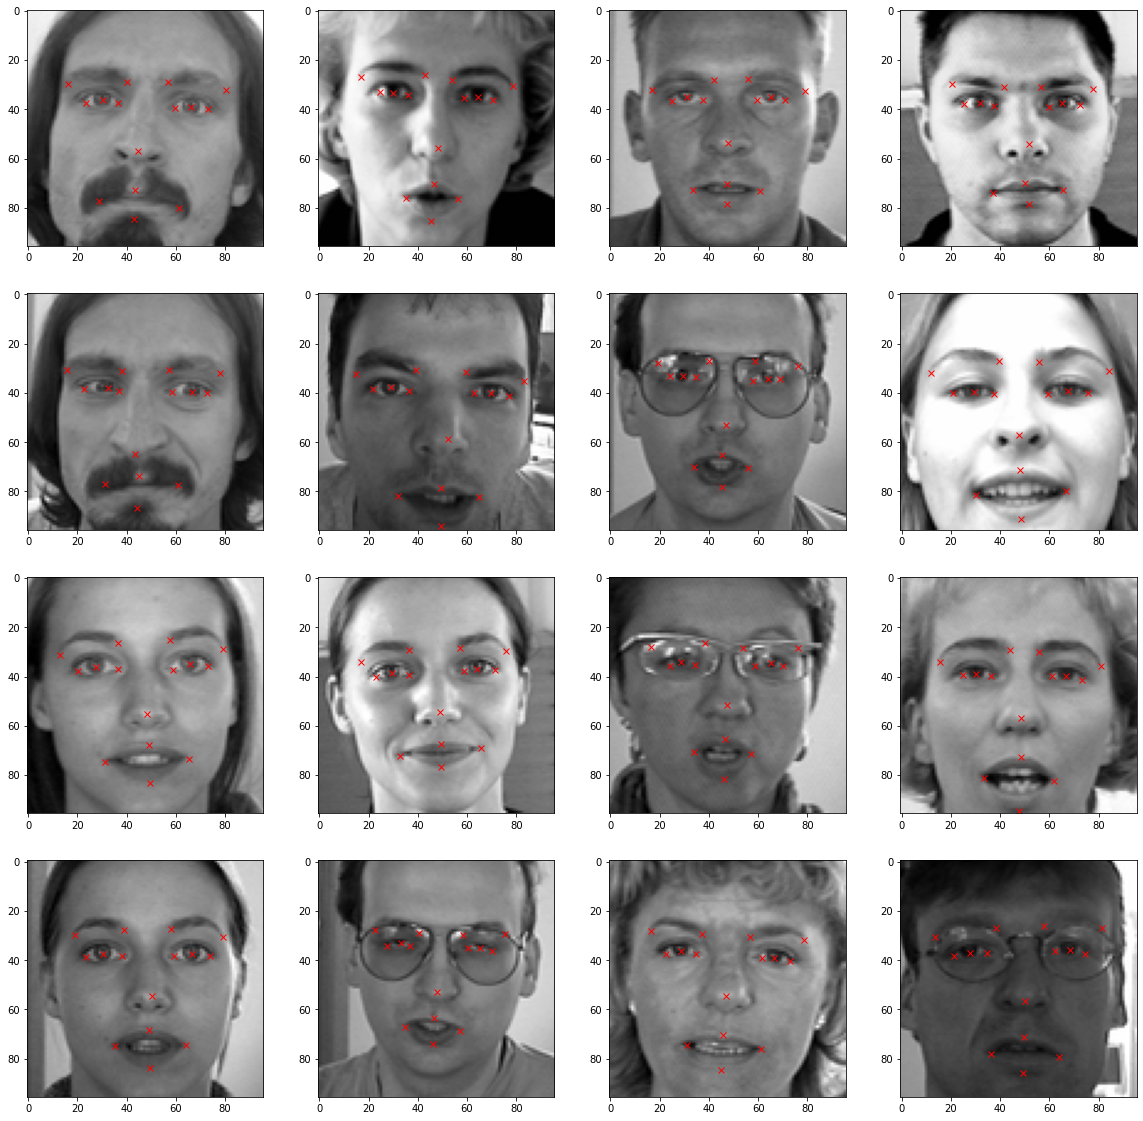

In [211]:
import random 

#lets view more images in a grid format
fig = plt.figure(figsize = (20,20))

for i in range(16): #Showing 16 images in a grid
    ax = fig.add_subplot(4,4,i+1)
    image = plt.imshow(facialpoints_df['Image'][i], cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(facialpoints_df.loc[i][j-1], facialpoints_df.loc[i][j], 'rx')

#### Mini Challenge 2 , plot 64 random images

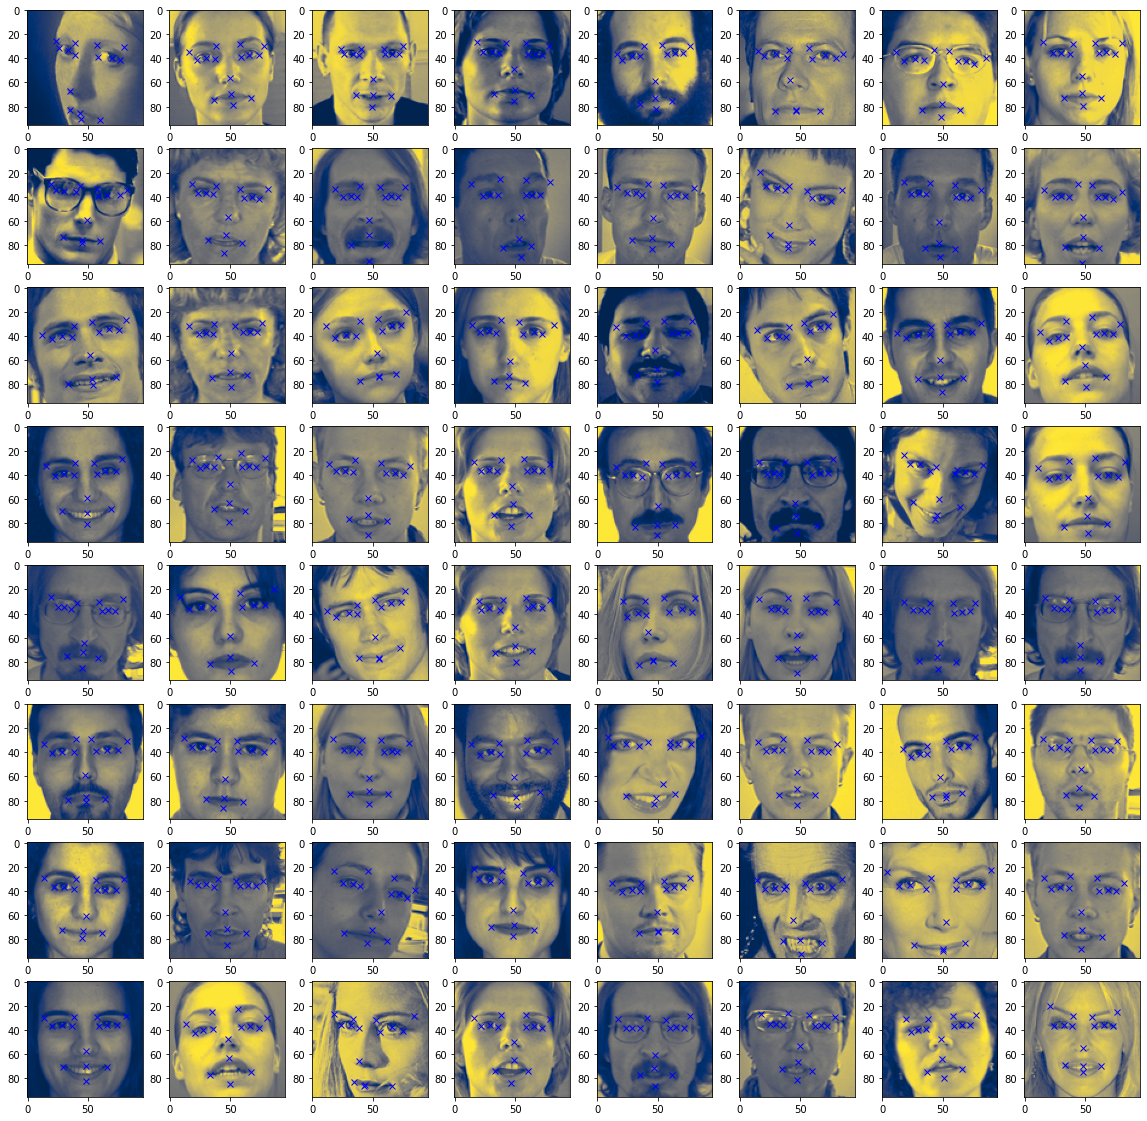

In [212]:
import random 
arr = random.sample(range(len(facialpoints_df)), 64)
#arr = np.random.randint(64, len(facialpoints_df))

#lets view more images in a grid format
fig = plt.figure(figsize = (20,20))
k = 0
for i in arr: #Showing 64 images in a grid
    ax = fig.add_subplot(8,8,k+1)
    k += 1
    image = plt.imshow(facialpoints_df['Image'][i], cmap = 'cividis')
    for j in range(1,31,2):
        plt.plot(facialpoints_df.loc[i][j-1], facialpoints_df.loc[i][j], 'bx')

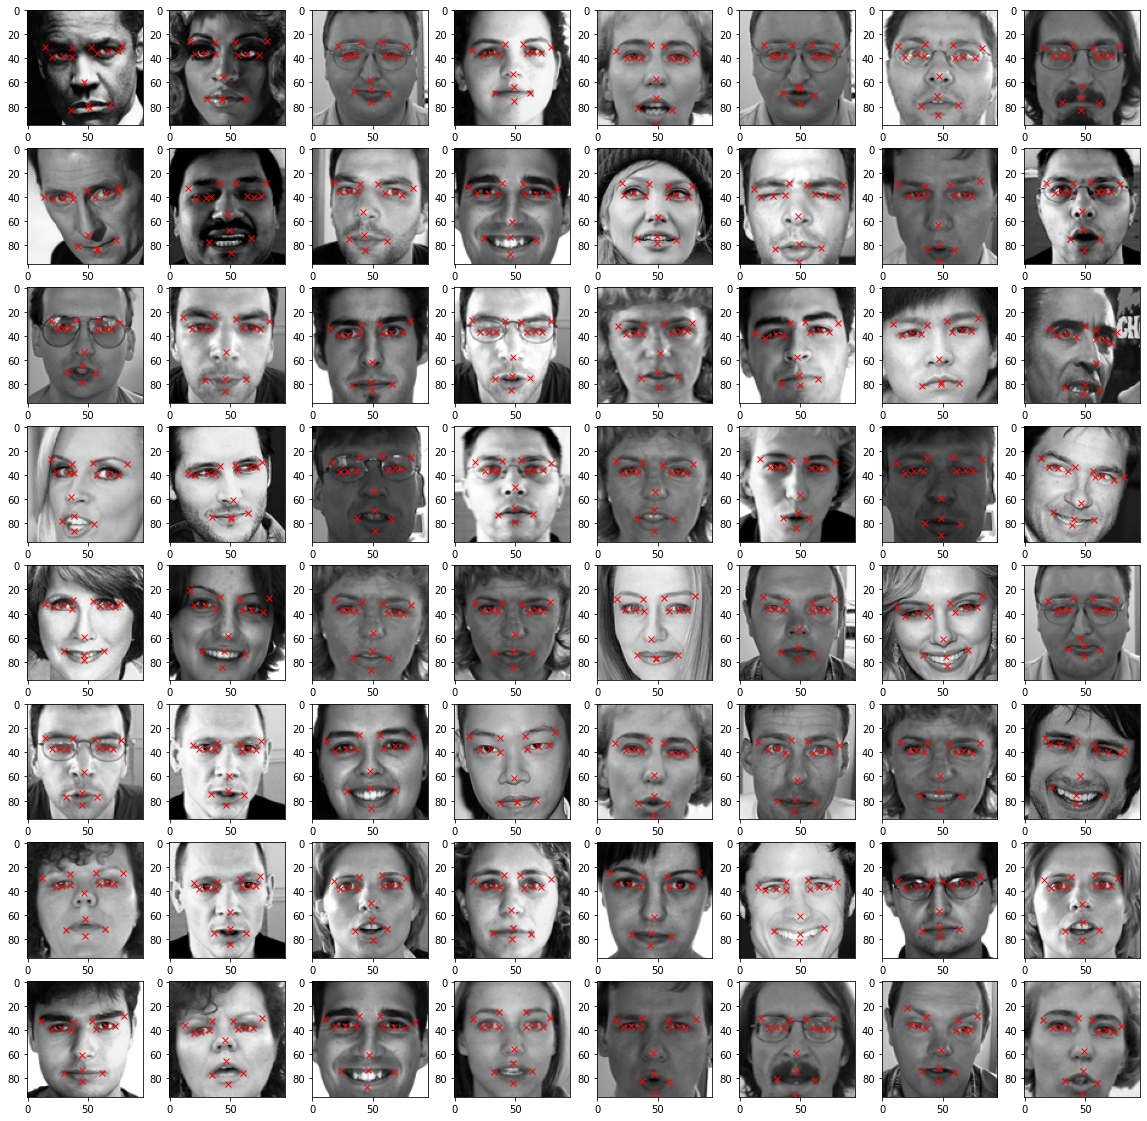

In [213]:

#lets view more images in a grid format
fig = plt.figure(figsize = (20,20))

for i in range(64): #Showing 16 images in a grid
    ax = fig.add_subplot(8,8,i+1)
    img = np.random.randint(1, len(facialpoints_df))
    image = plt.imshow(facialpoints_df['Image'][img], cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(facialpoints_df.loc[img][j-1], facialpoints_df.loc[img][j], 'rx')

## Perform Image Augmentation

In [214]:
import copy 
face_df = facialpoints_df.copy()
#Create a new copy of the dataframe

In [215]:
face_df.head()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          66.033564          39.002274           30.227008   
1          64.332936          34.970077           29.949277   
2          65.057053          34.909642           30.903789   
3          65.225739          37.261774           32.023096   
4          66.725301          39.621261           32.244810   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           36.421678                59.582075                39.647423   
1           33.448715                58.856170                35.274349   
2           34.909642                59.412000                36.320968   
3           37.261774                60.003339                39.127179   
4           38.042032                58.565890                39.621261   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                73.130346                39.969997                 36.356571   
1                70.722723                36.187166                 36.034723   
2                70.984421                36.320968                 37.678105   
3                72.314713                38.380967                 37.618643   
4                72.515926                39.884466                 36.982380   

   right_eye_inner_corner_y  ...  nose_tip_y  mouth_left_corner_x  \
0                 37.389402  ...   57.066803            61.195308   
1                 34.361532  ...   55.660936            56.421447   
2                 36.320968  ...   53.538947            60.822947   
3                 38.754115  ...   54.166539            65.598887   
4                 39.094852  ...   64.889521            60.671411   

   mouth_left_corner_y  mouth_right_corner_x  mouth_right_corner_y  \
0            79.970165             28.614496             77.388992   
1            76.352000             35.122383             76.047660   
2            73.014316             33.726316             72.732000   
3            72.703722             37.245496             74.195478   
4            77.523239             31.191755             76.997301   

   mouth_center_top_lip_x  mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
0               43.312602               72.935459                  43.130707   
1               46.684596               70.266553                  45.467915   
2               47.274947               70.191789                  47.274947   
3               50.303165               70.091687                  51.561183   
4               44.962748               73.707387                  44.227141   

   mouth_center_bottom_lip_y  \
0                  84.485774   
1                  85.480170   
2                  78.659368   
3                  78.268383   
4                  86.871166   

                                               Image  
0  [[238, 236, 237, 238, 240, 240, 239, 241, 241,...  
1  [[219, 215, 204, 196, 204, 211, 212, 200, 180,...  
2  [[144, 142, 159, 180, 188, 188, 184, 180, 167,...  
3  [[193, 192, 193, 194, 194, 194, 193, 192, 168,...  
4  [[147, 148, 160, 196, 215, 214, 216, 217, 219,...  

[5 rows x 31 columns]

In [216]:
#Obtain the header of the Dataframe (names of columns)
columns = face_df.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [217]:
face_df['Image'][0] #Take a look at the pixel values of a sample image 

array([[238, 236, 237, ..., 250, 250, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [237, 236, 237, ..., 251, 251, 250],
       ...,
       [186, 183, 181, ...,  52,  57,  60],
       [189, 188, 207, ...,  61,  69,  78],
       [191, 184, 184, ...,  70,  75,  90]])

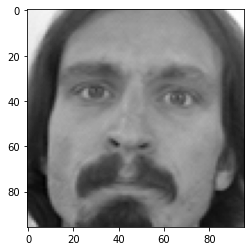

In [218]:
plt.imshow(face_df['Image'][0], cmap = 'gray')

We will be doing two kinds of Image Augmentation \
1:Flip the image \
2:Increase the brightness

In [219]:
# Flip the image vertically along the Y-axis
face_df['Image'] = face_df['Image'].apply(lambda x: np.flip(x, axis = 1))

In [220]:
#Here is the array with pixel values flipped
face_df['Image'][0]

array([[250, 250, 250, ..., 237, 236, 238],
       [251, 250, 249, ..., 236, 238, 235],
       [250, 251, 251, ..., 237, 236, 237],
       ...,
       [ 60,  57,  52, ..., 181, 183, 186],
       [ 78,  69,  61, ..., 207, 188, 189],
       [ 90,  75,  70, ..., 184, 184, 191]])

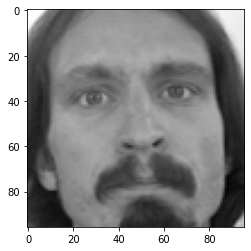

In [221]:
plt.imshow(face_df['Image'][0], cmap = 'gray') #Plotting the Flipped Sample Image

In [222]:
#Since we are flipping the images horizontally, Y-coordinate values would be same 
#X-coordinate values only would need to change, subtract x from 96 to do the flipping operation
for i in range(len(columns)):
    if i%2 == 0:
        face_df[columns[i]] = face_df[columns[i]].apply(lambda x: 96. - float(x))

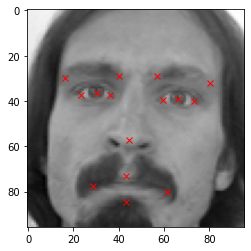

In [223]:
#View original image
plt.imshow(facialpoints_df['Image'][0], cmap = 'gray')
for j in range(1,31,2):
    plt.plot(facialpoints_df.loc[0][j-1], facialpoints_df.loc[0][j], 'rx')

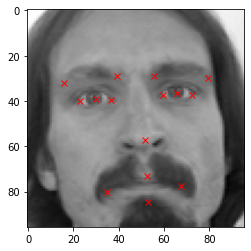

In [224]:
#View Flipped image along with all the key points
plt.imshow(face_df['Image'][0], cmap = 'gray')
for j in range(1,31,2):
    plt.plot(face_df.loc[0][j-1], face_df.loc[0][j], 'rx')

In [225]:
#Concatenate the original dataframe with the Augmented Dataframe
face_df_aug = np.concatenate((facialpoints_df,face_df))

In [226]:
face_df_aug.shape # We can see that the size of data is increased.

(4280, 31)

#### Image Augmentation 2 -- Increase the brightness of the image

In [227]:
#Randomly increasing the brightness of images
# Multiply pixel values by a random number between 1 and 2 , then clip the value between 0 and 255
import random

face_df_brt = facialpoints_df.copy()
face_df_brt['Image'] = facialpoints_df['Image'].apply(lambda x: np.clip(random.uniform(1,2)*x, 0, 255))
face_df_aug = np.concatenate((face_df_aug, face_df_brt))
face_df_aug.shape

(6420, 31)

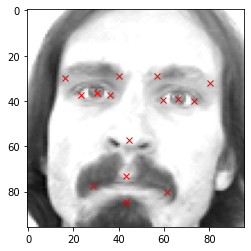

In [228]:
#Plot the image with increased brightness
plt.imshow(face_df_brt['Image'][0], cmap = 'gray')
for j in range(1,31,2):
    plt.plot(face_df_brt.loc[0][j-1], face_df_brt.loc[0][j], 'rx')

### Mini Challenge 3-- Flipping vertically - along X-axis, y-coordinates would change 

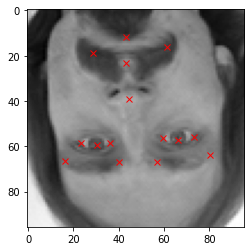

In [229]:
face_df_new = facialpoints_df.copy()
face_df_new['Image'] = face_df_new['Image'].apply(lambda x: np.flip(x, axis = 0))
for i in range(len(columns)):
    if i%2 != 0:
        face_df_new[columns[i]] = face_df_new[columns[i]].apply(lambda x: 96. - float(x))
#View Flipped image along with all the key points
plt.imshow(face_df_new['Image'][0], cmap = 'gray')
for j in range(1,31,2):
    plt.plot(face_df_new.loc[0][j-1], face_df_new.loc[0][j], 'rx')

In [230]:
face_df_new['Image'][0]

array([[191, 184, 184, ...,  70,  75,  90],
       [189, 188, 207, ...,  61,  69,  78],
       [186, 183, 181, ...,  52,  57,  60],
       ...,
       [237, 236, 237, ..., 251, 251, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [238, 236, 237, ..., 250, 250, 250]])

In [231]:
facialpoints_df['Image'][0]

array([[238, 236, 237, ..., 250, 250, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [237, 236, 237, ..., 251, 251, 250],
       ...,
       [186, 183, 181, ...,  52,  57,  60],
       [189, 188, 207, ...,  61,  69,  78],
       [191, 184, 184, ...,  70,  75,  90]])

### Perform Normalization and Training Data Preparation

In [232]:
#Normalize the images 
img = face_df_aug[:,30] #Taking only the last column , Image column
img = img/255.

#Create an empty array of shape (6420, 96, 96, 1) to train the model
X = np.empty((len(img), 96, 96, 1))

#Iterate through the normalized images list and add image values to empty array
#We have to expand dimension from (96,96) to (96,96,1)
for i in range(len(img)):
    X[i,] = np.expand_dims(img[i], axis = 2)
    
#Convert the array type to float32
X = np.asarray(X).astype(np.float32)
X.shape

(6420, 96, 96, 1)

In [233]:
#Obtain the values of key face points coordinates, which are used as Target
y = face_df_aug[:,:30]
y = np.asarray(y).astype(np.float32)
y.shape

(6420, 30)

In [243]:
#Train and Test data split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [244]:
X_train.shape

(5136, 96, 96, 1)

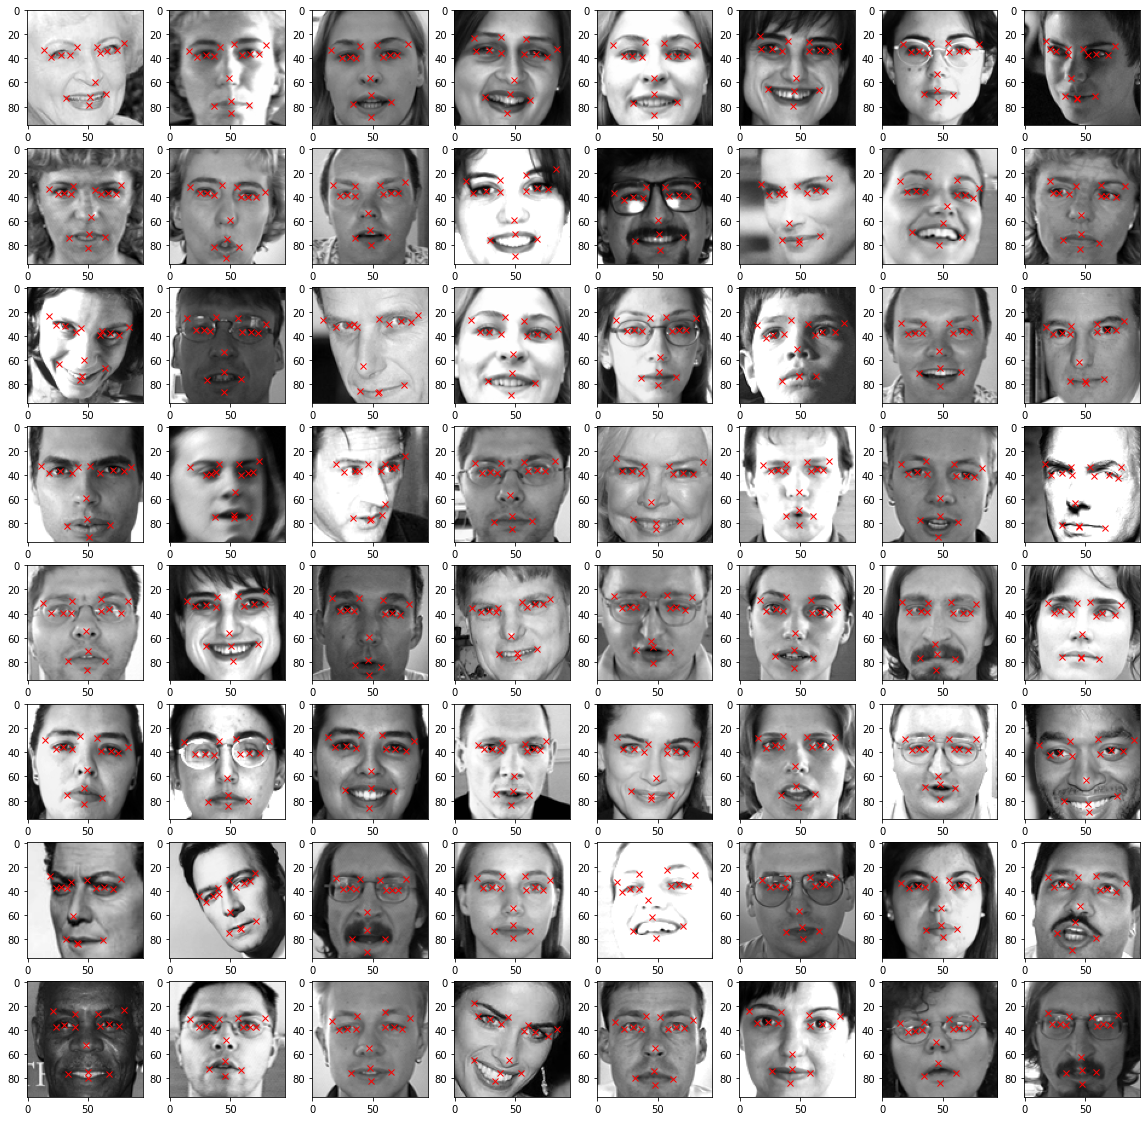

In [245]:
#lets view more images in a grid format
fig = plt.figure(figsize = (20,20))

for i in range(64): #Showing 16 images in a grid
    ax = fig.add_subplot(8,8,i+1)
    image = plt.imshow(X_train[i].reshape(96,96), cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(y_train[i][j-1], y_train[i][j], 'rx')